In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Ruta al archivo 
archivo_excel = '../DataSets/df_merged_cleaned.xlsx'

# Cargar el archivo  en un DataFrame
df = pd.read_excel(archivo_excel, engine='openpyxl')

# Mostrar las primeras filas para verificar la carga correcta
print(df.head())


          ID  N_VICTIMAS  AAAA  MM  DD  HORA  \
0  2016-0001           1  2016   1   1   4.0   
1  2016-0002           1  2016   1   2   1.0   
2  2016-0003           1  2016   1   3   7.0   
3  2016-0004           1  2016   1  10   0.0   
4  2016-0005           1  2016   1  21   5.0   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  COMUNA  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       avenida       8   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      gral paz       9   
2                         AV ENTRE RIOS 2034       avenida       1   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       avenida       8   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        avenida       1   

          pos x         pos y VICTIMA    ACUSADO        ROL       SEXO  EDAD  
0  -58.47533969  -34.68757022    moto       auto  conductor  masculino  19.0  
1  -58.50877521  -34.66977709    auto  pasajeros  conductor  masculino  70.0  
2  -58.39040293  -34.63189362    moto       auto  con

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               717 non-null    object 
 1   N_VICTIMAS       717 non-null    int64  
 2   AAAA             717 non-null    int64  
 3   MM               717 non-null    int64  
 4   DD               717 non-null    int64  
 5   HORA             716 non-null    float64
 6   LUGAR_DEL_HECHO  716 non-null    object 
 7   TIPO_DE_CALLE    717 non-null    object 
 8   COMUNA           717 non-null    int64  
 9   pos x            717 non-null    object 
 10  pos y            717 non-null    object 
 11  VICTIMA          708 non-null    object 
 12  ACUSADO          694 non-null    object 
 13  ROL              706 non-null    object 
 14  SEXO             711 non-null    object 
 15  EDAD             664 non-null    float64
dtypes: float64(2), int64(5), object(9)
memory usage: 89.8+ KB


Modificamos el tipo de dato de la columna "COMUNA", pues, si bien cuenta con números, en rigor se trata de una variable categórica. Al pasarla al tipo de dato "object" responde mejor a su naturaleza y por ello, facilita su posterior tratamiento.

In [4]:
# Convertir la columna "COMUNA" a tipo object
df['COMUNA'] = df['COMUNA'].astype('object')

# Tratamiento de nulos y duplicados

In [5]:
# Sumar el número de valores nulos en cada columna del DataFrame
nulos_por_columna = df.isnull().sum()

# Imprimir el número de valores nulos por columna
print(nulos_por_columna)


ID                  0
N_VICTIMAS          0
AAAA                0
MM                  0
DD                  0
HORA                1
LUGAR_DEL_HECHO     1
TIPO_DE_CALLE       0
COMUNA              0
pos x               0
pos y               0
VICTIMA             9
ACUSADO            23
ROL                11
SEXO                6
EDAD               53
dtype: int64


Podemos apreciar que existe una pequeña cantidad de valores nulos. A efectos de poder rescatar las filas, vamos a imputar valores a las casillas NaN. En el caso de las variables numéricas, imputamos los valores nulos con la mediana. Mientras que en las variables categóricas, imputamos los valores nulos con la moda.

In [6]:
# Imputar valores faltantes para la variable numérica 'HORA' con la mediana
df['HORA'].fillna(df['HORA'].median(), inplace=True)

# Imputar valores faltantes para la variable numérica 'EDAD' con la mediana
df['EDAD'].fillna(df['EDAD'].median(), inplace=True)

# Para las variables categóricas, imputar con la moda
for columna in ['VICTIMA', 'ACUSADO', 'ROL', 'SEXO']:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# Verificar que ya no hay valores nulos
print(df.isnull().sum())

ID                 0
N_VICTIMAS         0
AAAA               0
MM                 0
DD                 0
HORA               0
LUGAR_DEL_HECHO    1
TIPO_DE_CALLE      0
COMUNA             0
pos x              0
pos y              0
VICTIMA            0
ACUSADO            0
ROL                0
SEXO               0
EDAD               0
dtype: int64


In [7]:
# Eliminar el valor nulo de "LUGAR_DEL_HECHO"
df = df.dropna(subset=['LUGAR_DEL_HECHO'])

Apreciamos que no tenemos valores duplicados en nuestro DataFrame

In [8]:
duplicados = df[df.duplicated()]

# Muestra todas las filas duplicadas
print("Filas duplicadas en el DataFrame:")
print(duplicados)


Filas duplicadas en el DataFrame:
Empty DataFrame
Columns: [ID, N_VICTIMAS, AAAA, MM, DD, HORA, LUGAR_DEL_HECHO, TIPO_DE_CALLE, COMUNA, pos x, pos y, VICTIMA, ACUSADO, ROL, SEXO, EDAD]
Index: []


# Análisis de las variables numéricas.

A partir de estos resultados, podemos concluir lo siguiente:


- N_VICTIMAS: La mayoría de los incidentes involucran a 1 víctima, como se muestra por la mediana (línea dentro de la caja) y los cuartiles que son todos iguales a 1.
Hay pocos casos con más de 1 víctima (outliers).

- AAAA (Año): Los datos abarcan de 2016 a 2021, con una distribución relativamente uniforme a lo largo de los años.

- MM (Mes): Los datos están uniformemente distribuidos a lo largo de los meses, sin outliers.

- DD (Día): La distribución de los días es uniforme a lo largo del mes, sin outliers.

- HORA: La hora de los incidentes muestra una distribución uniforme a lo largo del día.
La mediana y los cuartiles están distribuidos de manera equitativa, indicando que no hay horas específicas con una concentración anormal de incidentes.

- EDAD: La edad de las víctimas tiene una distribución más amplia, con una mediana de 37 años y un rango que va desde 1 hasta 95 años.


In [9]:
# Resumen estadístico de las variables numéricas
print(df.describe())


       N_VICTIMAS         AAAA          MM          DD        HORA        EDAD
count  716.000000   716.000000  716.000000  716.000000  716.000000  716.000000
mean     1.061453  2018.177374    6.682961   15.951117   11.541899   41.791899
std      0.257193     1.671846    3.573999    8.680602    6.692626   19.102081
min      1.000000  2016.000000    1.000000    1.000000    0.000000    1.000000
25%      1.000000  2017.000000    4.000000    9.000000    6.000000   28.000000
50%      1.000000  2018.000000    7.000000   16.000000   11.000000   37.000000
75%      1.000000  2019.000000   10.000000   23.000000   17.000000   55.000000
max      3.000000  2021.000000   12.000000   31.000000   23.000000   95.000000


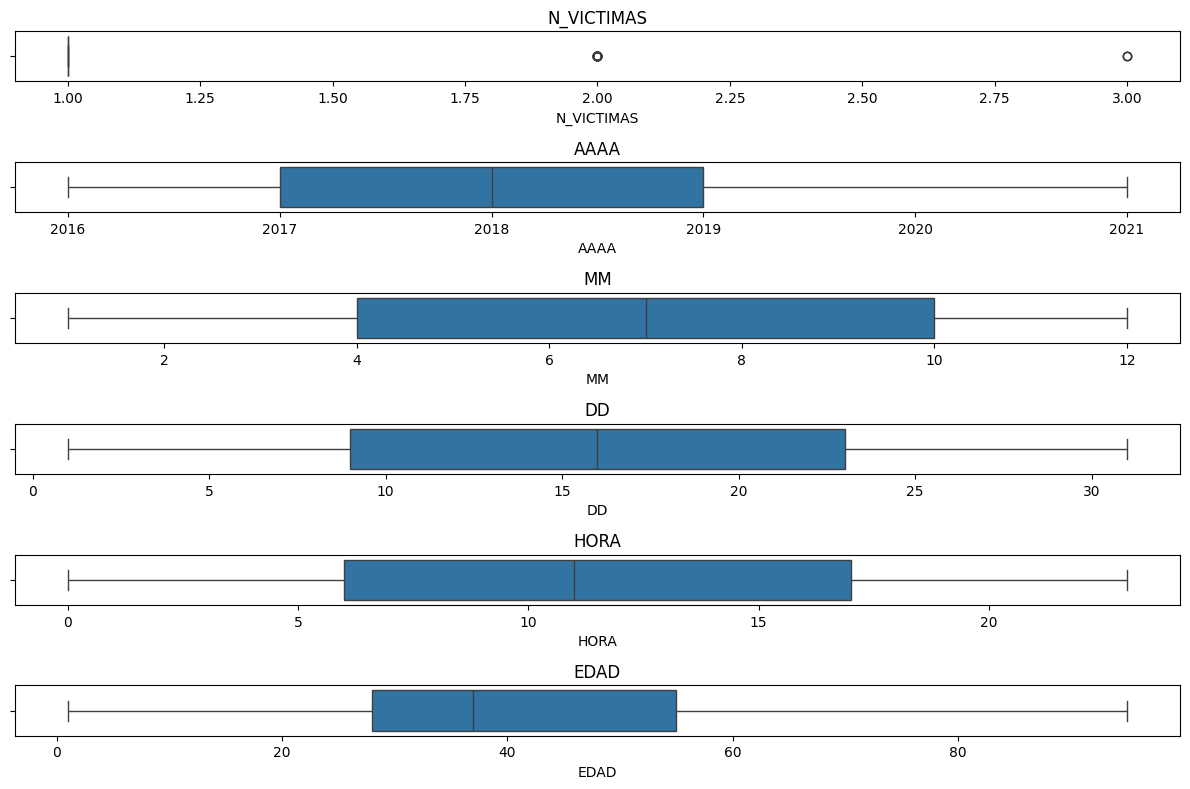

In [10]:
# Seleccionamos las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Configurar el tamaño de la figura para acomodar los boxplots
plt.figure(figsize=(12, 8))

# Generar boxplots para cada columna numérica
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i)
    sns.boxplot(x=df[columna])
    plt.title(columna)

# Ajustar layout para evitar la superposición de títulos
plt.tight_layout()
plt.show()


## Histrogramas variables numéricas.

Utilizamos histogramas para profundizar en las variables numéricas y poder encontrar patrones que nos permitan entender mejor el fenómeno.

- Distribución de la Edad de las Víctimas: La mayoría de las víctimas están en el rango de 20 a 60 años, con un pico notable en torno a los 30 años. Además, hay una disminución gradual en la frecuencia a medida que la edad aumenta después de los 60 años. Finalmente, la presencia de individuos muy jóvenes y muy mayores es mucho menos frecuente.

- Distribución del Día: Los incidentes están bastante uniformemente distribuidos a lo largo del mes.

- Distribución del Mes: Existe una variación en la frecuencia de incidentes a lo largo del año. Esto se manifiesta en que los meses finales (noviembre y diciembre) muestran un aumento en la frecuencia de incidentes. Esto podría estar relacionado con factores estacionales como las vacaciones o las condiciones climáticas.

- Distribución de la Hora: La frecuencia de incidentes aumenta desde la madrugada hasta alcanzar un primer pico en las horas de la mañana. Luego hay una disminución durante el mediodía seguida de un incremento nuevamente en la tarde. Finalmente, la frecuencia disminuye después de las horas pico de la tarde, con los incidentes menos frecuentes durante la noche.

- Víctimas por año: La cantidad total de víctimas fue relativamente estable entre 2016 y 2018, con una ligera disminución en 2019. Se observa, además, una reducción más notable en 2020, que podría ser atribuible a eventos específicos de ese año, como la pandemia de COVID-19 y las consecuentes restricciones de movilidad o cambios en el comportamiento social.
En 2021, la cantidad de víctimas permanece por debajo de los niveles de 2018, aunque muestra una ligera recuperación respecto a 2020.


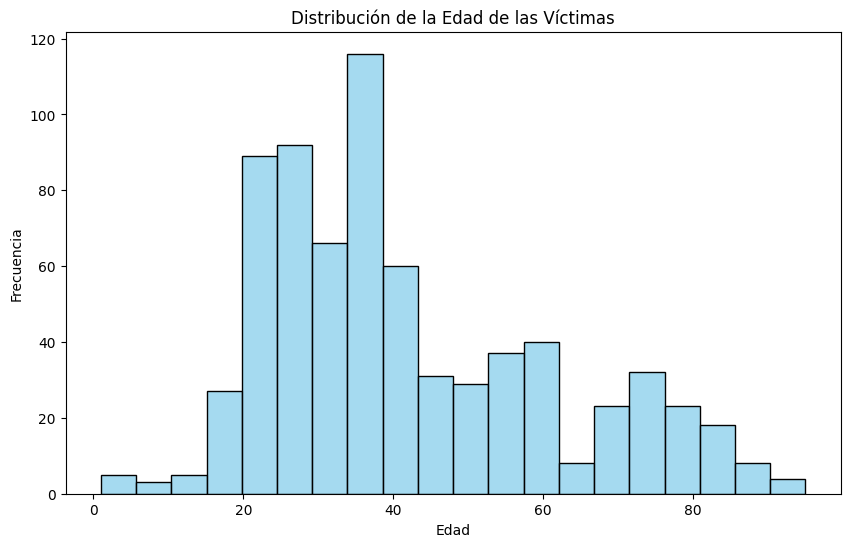

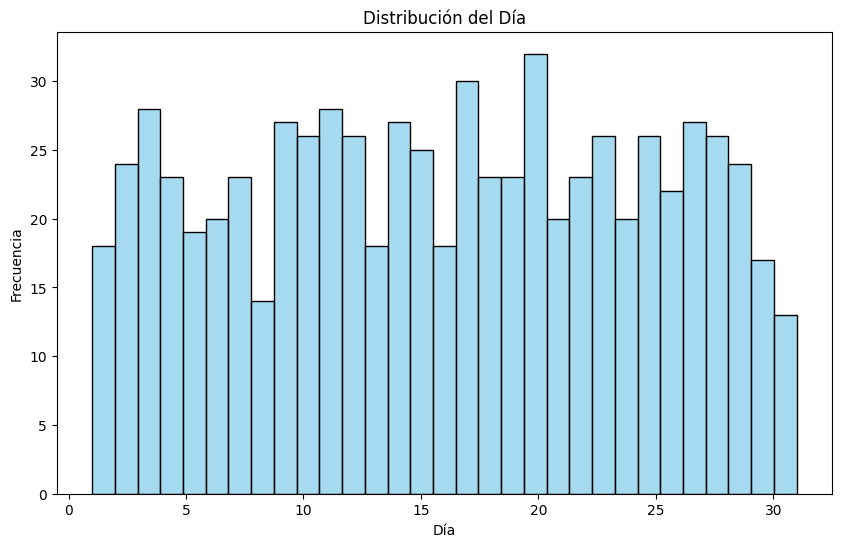

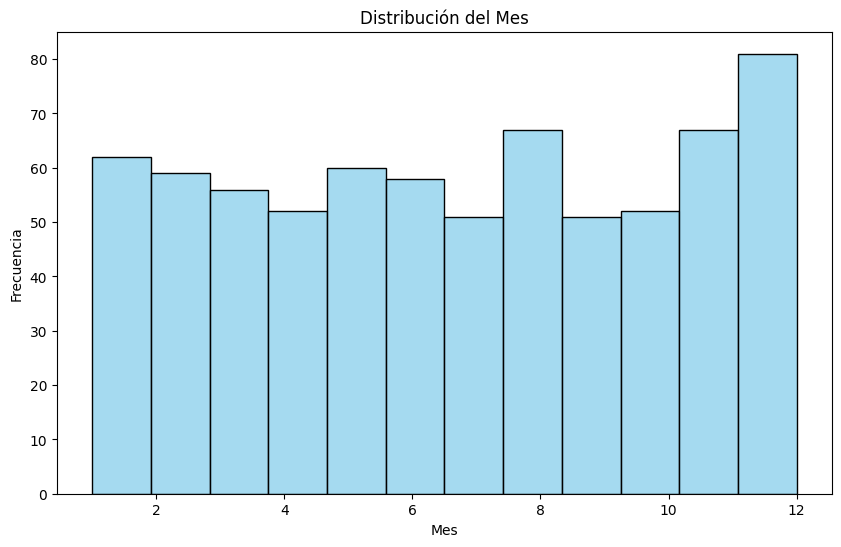

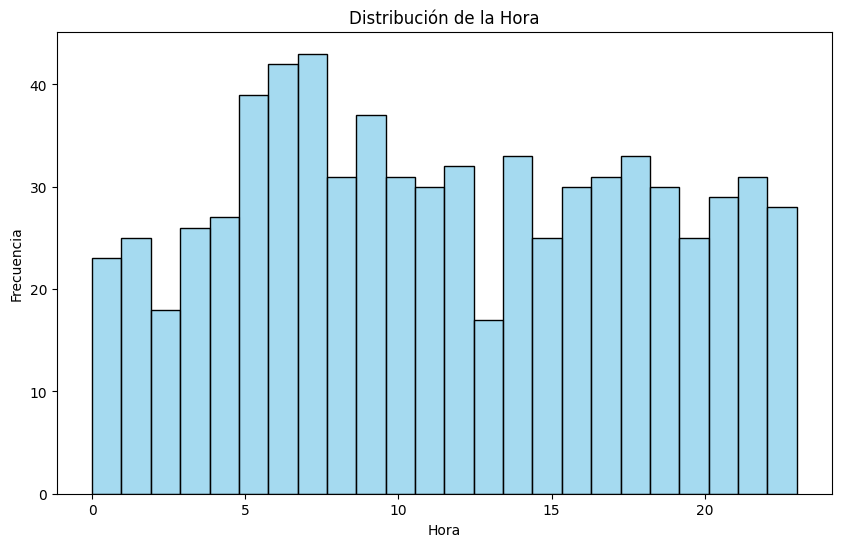

In [11]:

# Visualizar la distribución de la edad de las víctimas con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['EDAD'], kde=False, bins=20, color='skyblue')
plt.title('Distribución de la Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del día
plt.figure(figsize=(10, 6))
sns.histplot(df['DD'], kde=False, bins=31, color='skyblue')
plt.title('Distribución del Día')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del mes
plt.figure(figsize=(10, 6))
sns.histplot(df['MM'], kde=False, bins=12, color='skyblue')
plt.title('Distribución del Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de la hora
plt.figure(figsize=(10, 6))
sns.histplot(df['HORA'], kde=False, bins=24, color='skyblue')
plt.title('Distribución de la Hora')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.show()




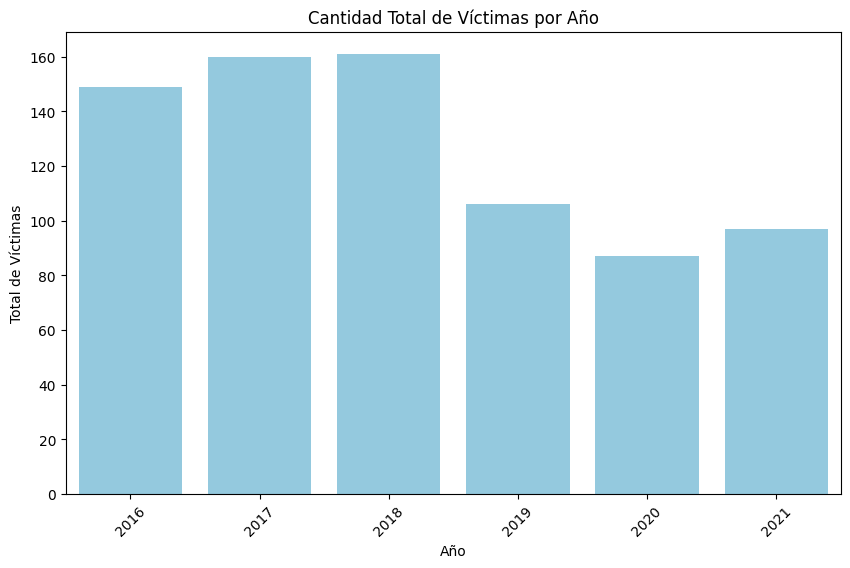

In [12]:
# Calcular el total de víctimas por año
victimas_por_año = df.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

# Visualizar la cantidad total de víctimas por año
plt.figure(figsize=(10, 6))
sns.barplot(data=victimas_por_año, x='AAAA', y='N_VICTIMAS', color='skyblue')
plt.title('Cantidad Total de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Total de Víctimas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.show()


Para finalizar convertimos las columnas "EDAD" y "HORA" a entero.

In [13]:
# Convertir la columna "HORA" a entero
df['HORA'] = df['HORA'].astype(int)

# Convertir la columna "EDAD" a entero
df['EDAD'] = df['EDAD'].astype(int)

# Análisis de las Variables categóricas     

Al observar los gráficos de barras de las variables, podemos afirmar lo siguiente:

- Al observar la columna "ROL" y "VICTIMA" apreciamos que la mayoría de las víctimas, y de manera significativa, son los conductores de moto y los peatones.

- La mayoría de los acusados son conuctores de autos, vehículos de pasajeros (transporte público) y conductores de vehículos de carga.

- La mayoría de las víctimas son de sexo masculino.

- La mayoría de los accidentes fatales ocurren en avenidas.

- Las comunas con más accidentes son las 1, 4 y 9.

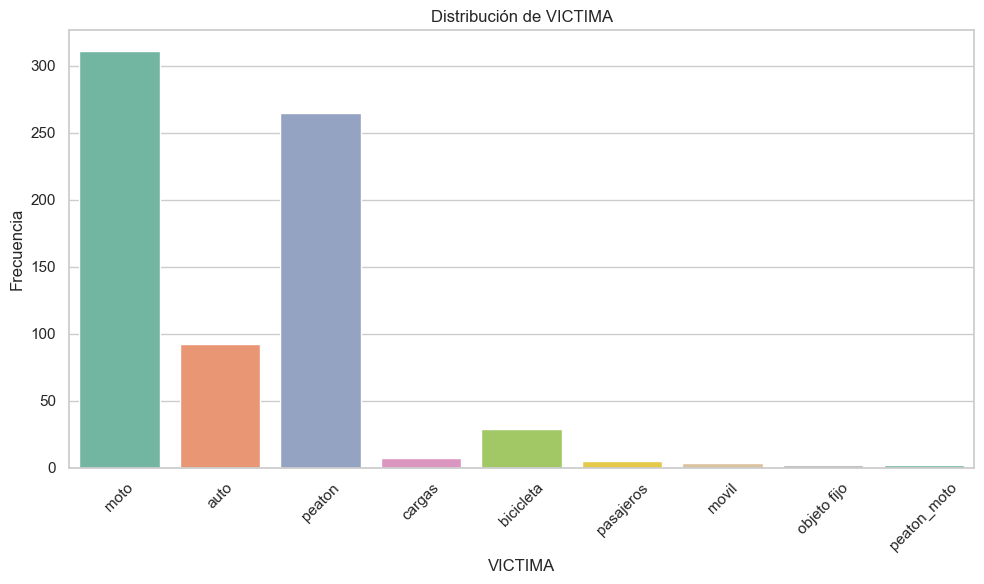

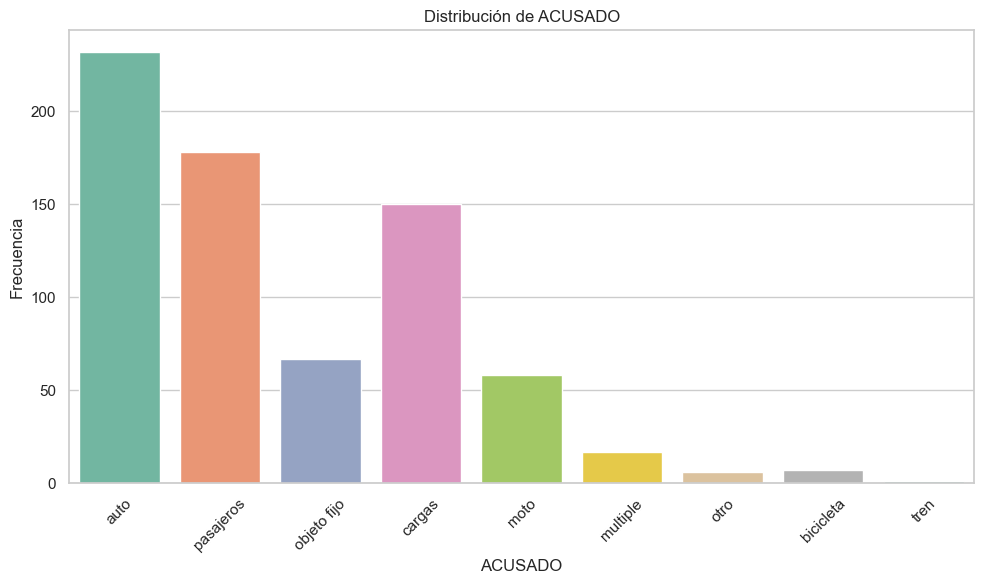

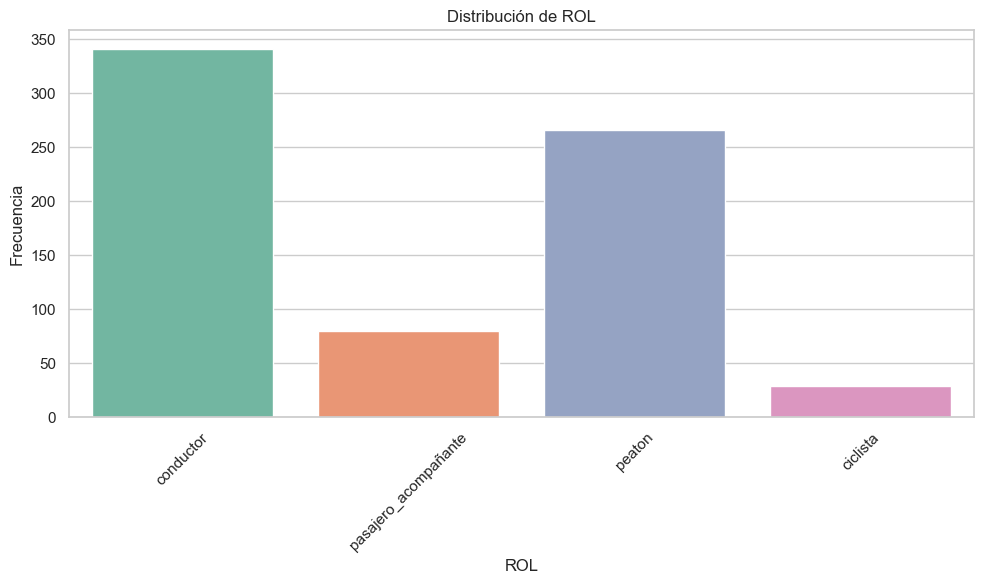

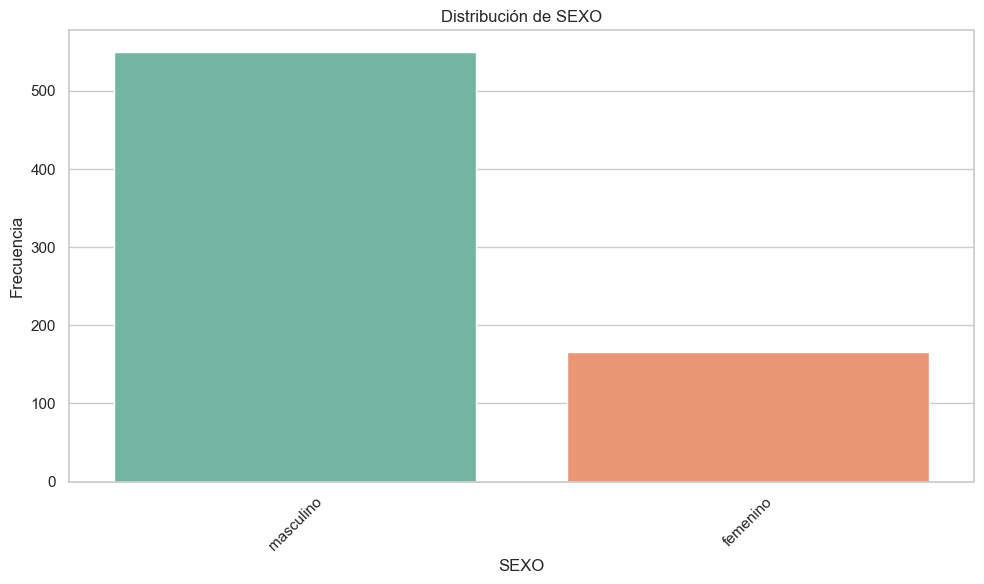

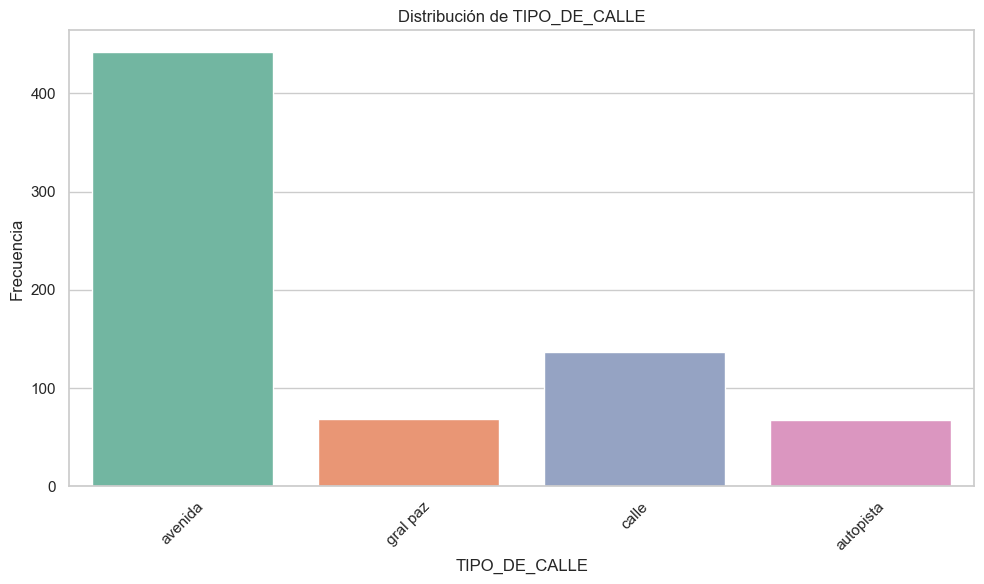

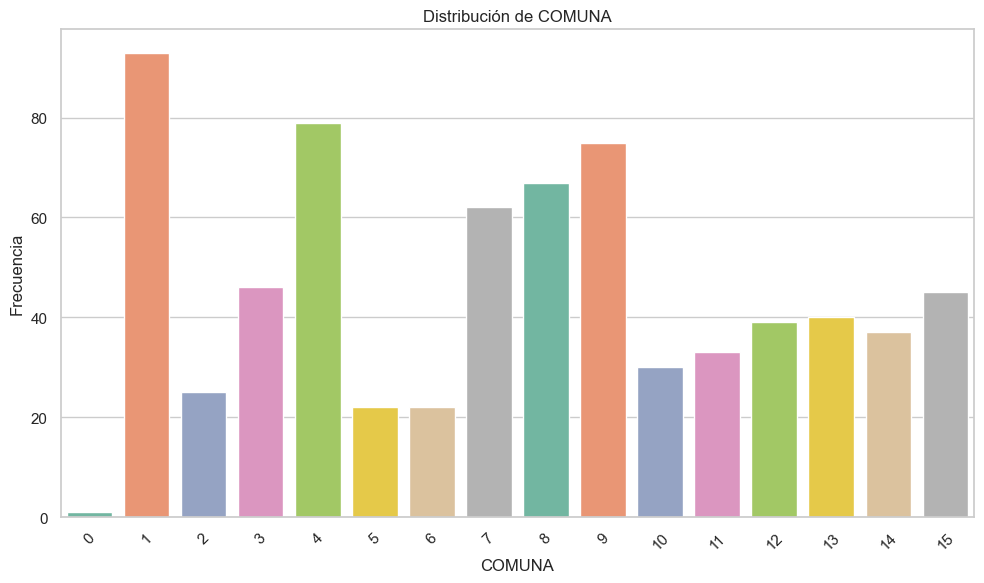

In [14]:
# Configurar el estilo visual de los gráficos
sns.set(style="whitegrid")

# Lista de variables categóricas
variables_categoricas = ['VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'TIPO_DE_CALLE', 'COMUNA']

# Crear un gráfico de barras para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, data=df, palette='Set2')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45) # Rota las etiquetas para mejor legibilidad si es necesario
    plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama
    plt.show()


## Transformaciones para variables categóricas.

Para facilitar la manipulación de los datos en las columnas "VICTIMA" y "ACUSADO", juntamos aquellas categorías, que por su bajo porcentaje, tienen muy poca incidencia y las incluímos en la categoría "otros". 

In [15]:
# Definir las categorías a reemplazar
categorias_a_reemplazar = ['movil', 'peaton_moto', 'objeto fijo']

# Reemplazar las categorías definidas por "otros"
df['VICTIMA'] = df['VICTIMA'].replace(categorias_a_reemplazar, 'otros')

# Verificar los cambios mostrando los valores únicos actualizados de la columna "VICTIMA"
print(df['VICTIMA'].unique())


['moto' 'auto' 'peaton' 'cargas' 'bicicleta' 'pasajeros' 'otros']


In [16]:
# Definir las categorías a reemplazar
categorias_a_reemplazar = ['otro', 'tren']

# Reemplazar las categorías definidas por "otros"
df['ACUSADO'] = df['ACUSADO'].replace(categorias_a_reemplazar, 'otros')

# Verificar los cambios mostrando los valores únicos actualizados de la columna "ACUSADO"
print(df['ACUSADO'].unique())


['auto' 'pasajeros' 'objeto fijo' 'cargas' 'moto' 'multiple' 'otros'
 'bicicleta']


Corregimos el nombre de la columna "TIPO_DE_CALLE" a "TIPO_DE_RUTA" para evitar confusiones, pues una de las categorías se llama "calle". 

Además, la categoría "gral paz" la incluímos dentro de "avenida", pues General Paz alude a una avenida de CABA.

In [17]:
# Cambiar el nombre de la columna "TIPO_DE_CALLE" a "TIPO_DE_RUTA"
df.rename(columns={'TIPO_DE_CALLE': 'TIPO_DE_RUTA'}, inplace=True)

# Incluir "gral paz" dentro de la categoría "avenida"
df['TIPO_DE_RUTA'] = df['TIPO_DE_RUTA'].replace('gral paz', 'avenida')

# Mostrar los nuevos nombres de columnas
print(df.columns)

Index(['ID', 'N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HORA', 'LUGAR_DEL_HECHO',
       'TIPO_DE_RUTA', 'COMUNA', 'pos x', 'pos y', 'VICTIMA', 'ACUSADO', 'ROL',
       'SEXO', 'EDAD'],
      dtype='object')


In [18]:
# Verificar los valores únicos en la columna actualizada "TIPO_DE_RUTA"
print(df['TIPO_DE_RUTA'].unique())


['avenida' 'calle' 'autopista']


Eliminamos la comuna "0", pues no existe y sólo tiene dos valores, por lo que es prescindible.

In [19]:
# Eliminar filas donde la columna "COMUNA" es igual a 0
df = df[df['COMUNA'] != 0]

# Verificar los cambios mostrando los valores únicos actualizados de la columna "COMUNA"
print(df['COMUNA'].unique())


[8 9 1 11 15 4 7 12 3 13 14 10 6 2 5]


## Renombrar columnas

In [20]:
df.head(5)

,ID,N_VICTIMAS,AAAA,MM,DD,HORA,LUGAR_DEL_HECHO,TIPO_DE_RUTA,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,avenida,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,avenida,8,-58.46503904,-34.68092974,moto,auto,conductor,masculino,18
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29


In [21]:
# Cambiar los nombres de las columnas
df.rename(columns={
    'AAAA': 'AÑO',
    'MM': 'MES',
    'DD': 'DIA',
    'pos x': 'X',
    'pos y': 'Y'
}, inplace=True)

# Verificar los nuevos nombres de columnas
print(df.columns)


Index(['ID', 'N_VICTIMAS', 'AÑO', 'MES', 'DIA', 'HORA', 'LUGAR_DEL_HECHO',
       'TIPO_DE_RUTA', 'COMUNA', 'X', 'Y', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO',
       'EDAD'],
      dtype='object')


Guardamos el DataFrame

In [22]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('../DataSets/df_definitivo.csv', index=False)

# KPIs (Key Performance Indicators)

## KPI 1: Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Al analizar los resultados, podemos decir que el KPI e cumplió de forma holgada. La disminución de la tasa de homicidios fue de un 23.6% aproximadamente.

In [23]:
# Separar los datos del año 2021 en dos semestres
primer_semestre_2021 = df[(df['AÑO'] == 2021) & (df['MES'] <= 6)]
segundo_semestre_2021 = df[(df['AÑO'] == 2021) & (df['MES'] > 6)]

# Contar la cantidad de fallecidos en cada semestre
fallecidos_primer_semestre_2021 = primer_semestre_2021['N_VICTIMAS'].sum()
fallecidos_segundo_semestre_2021 = segundo_semestre_2021['N_VICTIMAS'].sum()

fallecidos_primer_semestre_2021, fallecidos_segundo_semestre_2021

(55, 42)

La tasa de homicidios en siniestros viales se define como el número de víctimas fatales en accidentes de tránsito por cada 100000 habitantes en un área geográfica durante un período de tiempo específico.

In [24]:
# Datos proporcionados
fallecidos_primer_semestre_2021 = 55
fallecidos_segundo_semestre_2021 = 42
poblacion_CABA = 3120612  # Según censo 2022

# Calculando las tasas de homicidios en siniestros viales
tasa_primer_semestre_2021 = (fallecidos_primer_semestre_2021 / poblacion_CABA) * 100000
tasa_segundo_semestre_2021 = (fallecidos_segundo_semestre_2021 / poblacion_CABA) * 100000

# Calculando el porcentaje de reducción
porcentaje_reduccion = ((tasa_primer_semestre_2021 - tasa_segundo_semestre_2021) / tasa_primer_semestre_2021) * 100

tasa_primer_semestre_2021, tasa_segundo_semestre_2021, porcentaje_reduccion

(1.7624747966104084, 1.345889844684312, 23.636363636363633)

## KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Al analizar los resultados, podemos advertir que no  se redujo la cantidad de accidentes mortales en motocicletas en CABA entre el año 2021 y 2020, sino que aumentó considerablemte (64.3% aporx.). Esto se debe, probablemente, al relajamiento en las restricciones producto del retroseso de la pandemia. 

In [25]:
# Filtrar filas donde "VÍCTIMA" es igual a "moto"
df_moto = df[df['VICTIMA'] == 'moto']

# Contar cuántos accidentes fatales en moto corresponden a "2020" y "2021"
accidentes_2020 = df_moto[df_moto['AÑO'] == 2020].shape[0]
accidentes_2021 = df_moto[df_moto['AÑO'] == 2021].shape[0]

# Imprimir los resultados
print(f"Accidentes fatales en moto en el año 2020: {accidentes_2020}")
print(f"Accidentes fatales en moto en el año 2021: {accidentes_2021}")


Accidentes fatales en moto en el año 2020: 28
Accidentes fatales en moto en el año 2021: 46


In [26]:
# Calculando la variación porcentual en la cantidad de accidentes mortales de motociclistas entre 2020 y 2021
variacion_porcentual = ((accidentes_2021 - accidentes_2020) / (accidentes_2020) *100) 
variacion_porcentual

64.28571428571429

## KPI propuesto: Reducción de accidentes de tránsito fatales entre jóvenes de 18 a 30 años en un 5% respecto al año anterior en CABA.

Definimos KPI como un indicador de desempeño, respecto de un objetivo propuesto por una organización, para medir dicho desempeño se utilizan medidas numéricas denominadas métricas, en relación con los objetivos preestablecidos.

La diferencia principal entre métrica y KPI radica en que la métrica es simplemente una medida o un dato, sin un objetivo o meta explícita asociada a ella. Un ejemplo de métrica: Cantidad de accidentes mortales de motociclistas por año en CABA. Por su parte, un KPI incluye una meta o cambio deseado.

Para definir el KPI:
Objetivo Específico: reducir la cantidad de fallecidos en accidentes de tránsito entre jóvenes de 18 a 30 años en un 5 %.

Establecer un Indicador Numérico: el número total de fallecidos en accidentes de tránsito en el grupo etario de 18 a 30 años.
Hasta ahora ha tenido este comportamiento:

- 2016 a 2017: Hubo una disminución del 7.55%.
- 2017 a 2018: Hubo un aumento del 2.04%.
- 2018 a 2019: Hubo una disminución significativa del 40%.
- 2019 a 2020: Hubo otra disminución del 43.33%.

Establecer un Plazo: el plazo para lograr este objetivo es de 1 año.

Establecer una Meta Específica: disminuir el número total de fallecidos en el grupo etario de 18 a 30 años en un 5% en comparación con el año anterior.

Monitorear y Medir: Se deben recopilar datos sobre fallecidos en accidentes de tránsito en este grupo etario al final del período establecido y compararlos con los datos del año anterior para medir el cumplimiento del KPI.

In [27]:
# Filtrar por edad y año 
filtered_df = df[(df['EDAD'] >= 18) & (df['EDAD'] <= 30) & (df['AÑO'] >= 2016) & (df['AÑO'] <= 2020)]

# Contar la cantidad de personas entre 18 y 30 años fallecidad entre el 2016 y 2020
fatalities_per_year = filtered_df.groupby('AÑO').size()
fatalities_per_year


AÑO
2016    53
2017    49
2018    50
2019    30
2020    17
dtype: int64

In [28]:
# Filtrar rango de edad entre 18-30 y para los años 2016 al 2020
filtered_data = df[(df['EDAD'] >= 18) & (df['EDAD'] <= 30) & (df['AÑO'] >= 2016) & (df['AÑO'] <= 2020)]

# Contar el número de muertos por año
fatalities_per_year = filtered_data['AÑO'].value_counts().sort_index()

# Calcular año por año la diferencia porcentual
yearly_percentage_change = fatalities_per_year.pct_change() * 100

yearly_percentage_change


AÑO
2016          NaN
2017    -7.547170
2018     2.040816
2019   -40.000000
2020   -43.333333
Name: count, dtype: float64

Si ponemos a prueba el KPI respecto al año 2021 en comparación al 2020, podemos ver que aumentó la cantidad de fallecidos en este rango estario en un 58.82% aproximadamente.

In [29]:
# Filtrando las víctimas fatales en el rango de edad entre 18 y 30 años, para los años 2020 y 2021
filtro_edad = df['EDAD'].between(18, 30)
filtro_años = df['AÑO'].isin([2020, 2021])
df_filtrado = df[filtro_edad & filtro_años]

# Contando el número de víctimas fatales para cada año
victimas_2020 = df_filtrado[df_filtrado['AÑO'] == 2020].shape[0]
victimas_2021 = df_filtrado[df_filtrado['AÑO'] == 2021].shape[0]

victimas_2020, victimas_2021

(17, 27)

In [30]:
# Calculando el porcentaje de aumento o disminución de víctimas fatales de 2021 respecto a 2020
cambio_porcentual = ((victimas_2021 - victimas_2020) / victimas_2020) * 100
cambio_porcentual



58.82352941176471